<a href="https://colab.research.google.com/github/Shivans-Awasthi/Twitter-Sentiment-Analysis-using-TextBlob/blob/main/Twitter_Sentiment_Analysis_using_TextBlob_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving login keys.csv to login keys.csv


In [ ]:
#get the data
log = pd.read_csv('login keys.csv')

In [ ]:
#tweeter API credentials
consumerkeys = log['key'][0]
consumerSecret = log['key'][1]
bearerToken = log['key'][2]

In [ ]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerkeys,consumerSecret)

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:

posts = api.user_timeline(screen_name  = "Avengers", count=100,lang="en", tweet_mode="extended")
#Extract 5 tweets
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' +tweet.full_text + '\n')
  i=i+1

Show the 5 recent tweets: 

1) RT @theblackpanther: Experience the legacy of the Black Panther for yourself. See how Black Panther: #WakandaForever is taking over Avenger…

2) Bask in the cleansing fire of the Phoenix on @Artgerm's new variant cover for 'Avengers' #64, part of @jasonaaron's upcoming 'Avengers Assemble' epic! 🔥: https://t.co/SjSXp1VM4r https://t.co/1Y6PmCsDSM

3) RT @theblackpanther: The legacy of the Black Panther continues! See how you can celebrate the release of Black Panther: #WakandaForever acr…

4) Get a glimpse at the biggest Avengers saga in #MarvelComics history! Learn more about the crossover between @jasonaaron’s 'Avengers' and 'Avengers Forever' here: https://t.co/CaBvMDW4rr https://t.co/AtcUqFBXZQ

5) Avengers across time, assemble! 'Avengers' #62 brings History's Mightiest Heroes together, on sale now. https://t.co/lJ0uaM4GAP



In [ ]:
# create a dataframe with column called Tweet
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns=['Tweets'])
df.head()

,Tweets
0,RT @theblackpanther: Experience the legacy of ...
1,Bask in the cleansing fire of the Phoenix on @...
2,RT @theblackpanther: The legacy of the Black P...
3,Get a glimpse at the biggest Avengers saga in ...
4,"Avengers across time, assemble! 'Avengers' #62..."


In [ ]:
#clean the text
#function
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '' , text) #Removed @mentions
  text = re.sub(r'#','',text)                #removing '#' tags
  text = re.sub(r'RT[\s]+', '', text)        #removing RT
  text = re.sub(r'https?:[A-Za-z0-9/.]+','',text)   #removing urls

  return text

#cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,: Experience the legacy of the Black Panther f...
1,Bask in the cleansing fire of the Phoenix on '...
2,: The legacy of the Black Panther continues! S...
3,Get a glimpse at the biggest Avengers saga in ...
4,"Avengers across time, assemble! 'Avengers' 62 ..."
...,...
95,Note to self: Never get in an elevator with th...
96,"Meet Jolt, who plays Lucky the Pizza Dog in Ma..."
97,All of the trick arrows up close and personal!...
98,Jack's never been better! All episodes of Marv...


In [ ]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a func for polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity) 

#show new data frame
df

,Tweets,Subjectivity,Polarity
0,: Experience the legacy of the Black Panther f...,0.433333,-0.166667
1,Bask in the cleansing fire of the Phoenix on '...,0.427273,0.130682
2,: The legacy of the Black Panther continues! S...,0.433333,-0.187500
3,Get a glimpse at the biggest Avengers saga in ...,0.500000,0.500000
4,"Avengers across time, assemble! 'Avengers' 62 ...",0.000000,0.000000
...,...,...,...
95,Note to self: Never get in an elevator with th...,0.000000,0.000000
96,"Meet Jolt, who plays Lucky the Pizza Dog in Ma...",0.833333,0.416667
97,All of the trick arrows up close and personal!...,0.300000,0.000000
98,Jack's never been better! All episodes of Marv...,0.500000,0.625000


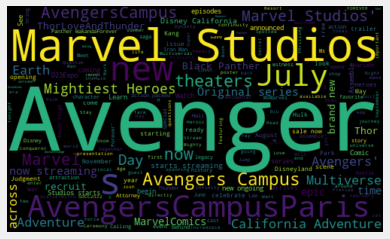

In [ ]:
from pandas.core.common import random_state
#plot word cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#create func to compute analysis
def getAnalysis(score):
  if score >= 0.05:
    return 'Positive'
  elif (score > -0.05 ) and (score < 0.05):
    return 'Neutral'
  else:
    return 'Negative'

df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,: Experience the legacy of the Black Panther f...,0.433333,-0.166667,Negative
1,Bask in the cleansing fire of the Phoenix on '...,0.427273,0.130682,Positive
2,: The legacy of the Black Panther continues! S...,0.433333,-0.187500,Negative
3,Get a glimpse at the biggest Avengers saga in ...,0.500000,0.500000,Positive
4,"Avengers across time, assemble! 'Avengers' 62 ...",0.000000,0.000000,Neutral
...,...,...,...,...
95,Note to self: Never get in an elevator with th...,0.000000,0.000000,Neutral
96,"Meet Jolt, who plays Lucky the Pizza Dog in Ma...",0.833333,0.416667,Positive
97,All of the trick arrows up close and personal!...,0.300000,0.000000,Neutral
98,Jack's never been better! All episodes of Marv...,0.500000,0.625000,Positive


In [ ]:
# print all positive
j =1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  print(str(j) + ') ' + sortedDF['Tweets'][i])
  j=j+1
  print()

1) : Experience the legacy of the Black Panther for yourself. See how Black Panther: WakandaForever is taking over Avenger…

2) Bask in the cleansing fire of the Phoenix on 's new variant cover for 'Avengers' 64, part of 's upcoming 'Avengers Assemble' epic! 🔥:  

3) : The legacy of the Black Panther continues! See how you can celebrate the release of Black Panther: WakandaForever acr…

4) Get a glimpse at the biggest Avengers saga in MarvelComics history! Learn more about the crossover between ’s 'Avengers' and 'Avengers Forever' here:  

5) Avengers across time, assemble! 'Avengers' 62 brings History's Mightiest Heroes together, on sale now. 

6) : Get ready for Free Comic Book Day 2023! 📚 Pick up these Marvel titles at your local participating comic shop on May 6: …

7) Avengers from across the Multiverse will come together for the greatest battle in their 60 year history in 'Avengers Assemble'! 

To celebrate,  takes Earth's Mightiest Heroes back to the Bronze Age in the first of f

In [ ]:
#print negtive tweets
j=1
sortedDF =  df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) : Experience the legacy of the Black Panther for yourself. See how Black Panther: WakandaForever is taking over Avenger…

2) : The legacy of the Black Panther continues! See how you can celebrate the release of Black Panther: WakandaForever acr…

3) : The Black Panther: WakandaForever celebration at AvengersCampus in Disney California Adventure begins November 11!…

4)  Get a frightening first look at the character now roaming around! 🌕

5) Who’s that lurking in the shadows?!  🐺 Werewolf by Night is now on the loose in AvengersCampus in DisneyCaliforniaAdventurePark. Stream WerewolfByNight on !  

6) Just announced in Hall H:

Marvel Studios' Avengers: Secret Wars, in theaters November 7, 2025. SDCC2022 

7) : Award-winning actor and producer  and his sons encounter Black Panther in AvengersCampus at Disney Califor…

8) : The 1 Avengers fan at Avengers Campus? Say less.

Kamala Khan arrives at AvengersCampus in California Adventure at Disneyla…

9) You'll like her when she's angry.


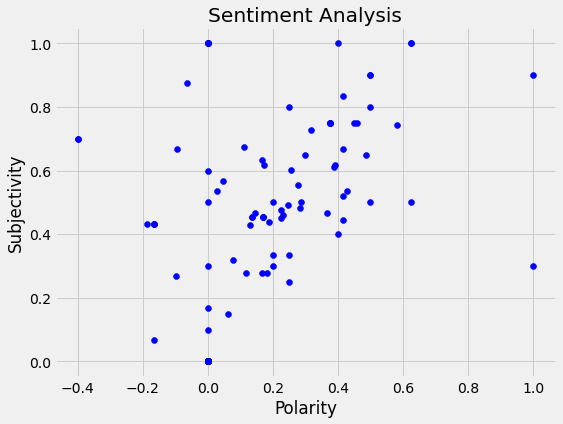

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100 , 1) 

59.0

In [ ]:
#get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

10.0

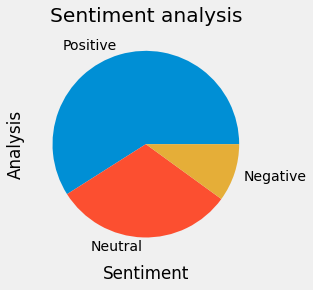

In [ ]:
#show the value counts

df['Analysis'].value_counts()

#plot the visualize the count
plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()